###Importing The Libraries

In [1]:
import numpy as np
import pandas as pd

###Importing the dataset

In [2]:
csv_path = 'isolated.csv'
# Ensure the file is uploaded in the folders section

###Reading the CSV files via calling the function

In [3]:
def read_csv(csv_path):
  np_path_XYs = np.genfromtxt(csv_path, delimiter=',')
  path_XYs = []
  for i in np.unique(np_path_XYs[:, 0]):
    npXYs = np_path_XYs[np_path_XYs[:, 0] == i] [:, 1:]
    XYs = []
    for j in np.unique(npXYs[:, 0]):
      XY = npXYs[npXYs[:, 0] == j][:, 1:]
      XYs.append(XY)
    path_XYs.append(XYs)
  return path_XYs

shapes = read_csv(csv_path)
print(shapes)



[[array([[109.14299774, 125.58000183],
       [110.15747833, 125.49578094],
       [111.17194366, 125.40398407],
       [112.18638611, 125.30522156],
       [113.20079041, 125.20011139],
       [114.21517181, 125.08926392],
       [115.22950745, 124.97328949],
       [116.2437973 , 124.85279083],
       [117.25804138, 124.72838593],
       [118.27222443, 124.60068512],
       [119.28635406, 124.47029877],
       [120.30041504, 124.33782959],
       [121.31440735, 124.2039032 ],
       [122.32831573, 124.06912231],
       [123.34214783, 123.93410492],
       [124.355896  , 123.79945374],
       [125.36954498, 123.66577911],
       [126.38310242, 123.53369141],
       [127.39655304, 123.40380859],
       [128.40989685, 123.27674103],
       [129.42312622, 123.15309143],
       [130.43623352, 123.03347778],
       [131.44923401, 122.91851044],
       [132.46208191, 122.80879974],
       [133.47480774, 122.70494843],
       [134.48739624, 122.60758209],
       [135.49983215, 122.51730347],

###Applying RDP Simplification

In [4]:
# Function to calculate the perpendicular distance from a point to a line defined by points a and b
def line_dist(c, a, b):
    ab = b - a
    ac = c - a
    norm_ab = np.linalg.norm(ab)
    proj_length = np.dot(ac, ab) / norm_ab
    norm = a + (proj_length / norm_ab) * ab
    return np.linalg.norm(c - norm)

# Function to find the index of the furthest point
def find_furthest(points, a, b, epsilon):
    max_distance = -1
    furthest_index = -1
    for i in range(a + 1, b):
        distance = line_dist(points[i], points[a], points[b])
        if distance > max_distance:
            max_distance = distance
            furthest_index = i
    return furthest_index if max_distance > epsilon else -1

# Recursive function to apply the RDP algorithm
def rdp(start_index, end_index, all_points, rdp_points, epsilon):
    next_index = find_furthest(all_points, start_index, end_index, epsilon)
    if next_index > 0:
        if start_index != next_index:
            rdp(start_index, next_index, all_points, rdp_points, epsilon)
        rdp_points.append(all_points[next_index])
        if end_index != next_index:
            rdp(next_index, end_index, all_points, rdp_points, epsilon)

# Function to simplify a polyline using the RDP algorithm
def rdp_simplify(points, epsilon=20):
    if points.shape[0] < 2:
        return points
    rdp_points = [points[0]]
    rdp(0, len(points) - 1, points, rdp_points, epsilon)
    rdp_points.append(points[-1])
    return np.array(rdp_points)

In [5]:
# Applying RDP simplification to each shape in the 'shapes' list
simplified_shapes = [rdp_simplify(shape[0], epsilon=20) for shape in shapes if len(shape) > 0 and len(shape[0]) > 0]

###Visualising the polylines

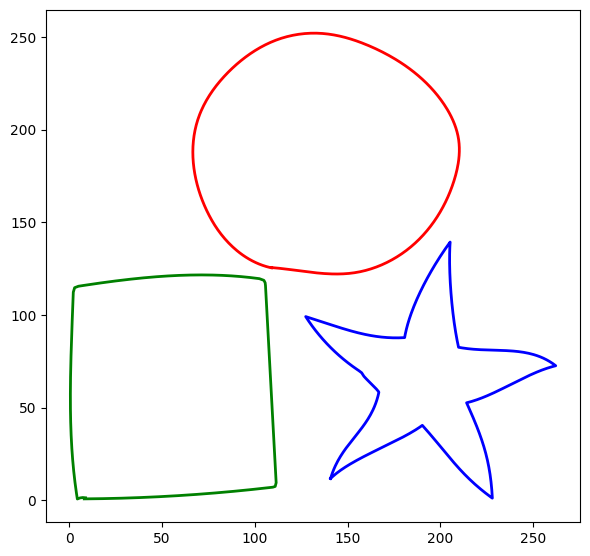

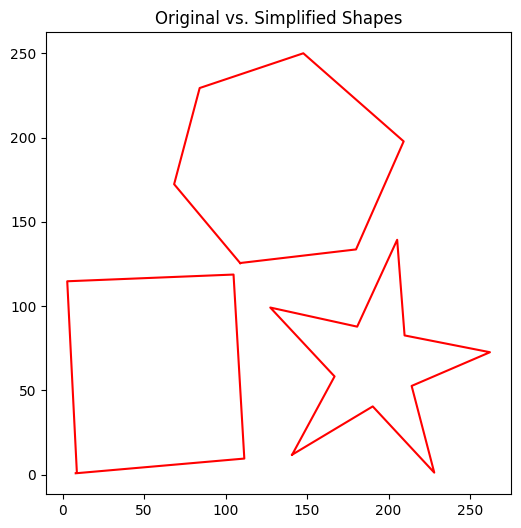

In [6]:
import matplotlib.pyplot as plt

# Plotting function
def plot(paths_XYs):
    colours = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    fig, ax = plt.subplots(tight_layout=True, figsize=(6, 6))
    for i, XYs in enumerate(paths_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], color=c, linewidth=2)
    ax.set_aspect('equal')
    plt.show()

plot(shapes)

# Plotting the original and simplified shapes
plt.figure(figsize=(6, 6))
for original, simplified in zip(shapes, simplified_shapes):
    if original:
        original = np.vstack(original)
        # plt.plot(original[:, 0], original[:, 1], 'b-', alpha=0.5)  # Original in blue
        plt.plot(simplified[:, 0], simplified[:, 1], 'r-')  # Simplified in red
plt.title("Original vs. Simplified Shapes")
plt.show()